### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
import pandas as pd
import yfinance as yf

# Fetch the data for "RELIANCE.NS"
df = yf.download("RELIANCE.NS")

[*********************100%***********************]  1 of 1 completed


In [3]:
df

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
1996-01-01,3.544921,3.550951,3.508740,3.531999,104121369
1996-01-02,3.517354,3.553535,3.491510,3.536306,168743308
1996-01-03,3.544060,3.737889,3.536307,3.575073,209323879
1996-01-04,3.511324,3.521661,3.463943,3.510462,216900264
1996-01-05,3.487203,3.497540,3.457052,3.497540,166708467
...,...,...,...,...,...
2025-01-24,1246.300049,1273.000000,1243.500000,1266.000000,14235970
2025-01-27,1229.349976,1240.449951,1220.000000,1239.099976,9536019


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
1996-01-01,3.544921,3.550951,3.508740,3.531999,104121369
1996-01-02,3.517354,3.553535,3.491510,3.536306,168743308
1996-01-03,3.544060,3.737889,3.536307,3.575073,209323879
1996-01-04,3.511324,3.521661,3.463943,3.510462,216900264
1996-01-05,3.487203,3.497540,3.457052,3.497540,166708467


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-01-24,1246.300049,1273.000000,1243.500000,1266.000000,14235970
2025-01-27,1229.349976,1240.449951,1220.000000,1239.099976,9536019
2025-01-28,1234.400024,1244.750000,1218.500000,1238.000000,10568025
2025-01-29,1235.500000,1242.750000,1228.050049,1236.000000,5928156
2025-01-30,1253.050049,1257.000000,1232.400024,1235.550049,9267054


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

Ticker,RELIANCE.NS
0,3.544921
1,3.517354
2,3.544060
3,3.511324
4,3.487203
...,...
7298,1246.300049
7299,1229.349976
7300,1234.400024
7301,1235.500000


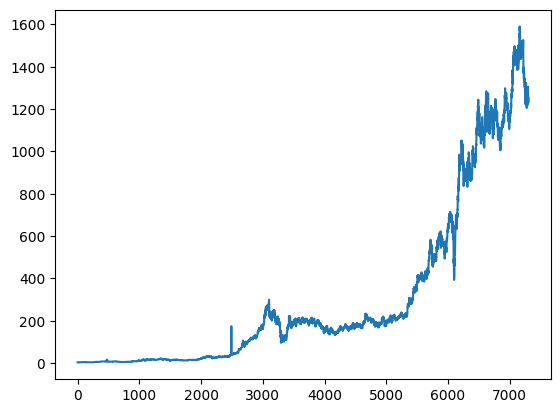

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
df1

Ticker,RELIANCE.NS
0,3.544921
1,3.517354
2,3.544060
3,3.511324
4,3.487203
...,...
7298,1246.300049
7299,1229.349976
7300,1234.400024
7301,1235.500000


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[5.64930574e-04]
 [5.47564286e-04]
 [5.64388230e-04]
 ...
 [7.75944919e-01]
 [7.76637851e-01]
 [7.87693545e-01]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(4746, 2557)

In [16]:
train_data

array([[0.00056493],
       [0.00054756],
       [0.00056439],
       ...,
       [0.13079336],
       [0.12911738],
       [0.12607191]])

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(4742, 3)
(4742,)


(None, None)

In [20]:

print(ytest)


[0.12765658 0.12430463 0.1242003  ... 0.77276363 0.77594492 0.77663785]


In [21]:
print(X_test.shape), print(ytest.shape)

(2553, 3)
(2553,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], time_step, 1))

# reshape X_test to match the input shape of the model
X_test = X_test.reshape((X_test.shape[0], time_step, 1))

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/Users/mayank/Documents/Projects Mayank/Stock-prediction-main/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9089e-05 - val_loss: 2.0291e-04
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3459e-05 - val_loss: 2.0967e-04
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1702e-05 - val_loss: 3.3136e-04
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6033e-06 - val_loss: 3.5063e-04
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1991e-06 - val_loss: 2.9421e-04
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3331e-06 - val_loss: 3.6288e-04
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8576e-06 - val_loss: 3.9683e-04
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6908e-06 - val_loss: 7.2293e-04
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4248e-06 - val_loss: 0.0012
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1642e-05 - val_loss

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.18.0'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

116.66543889881892

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

769.7751518324892

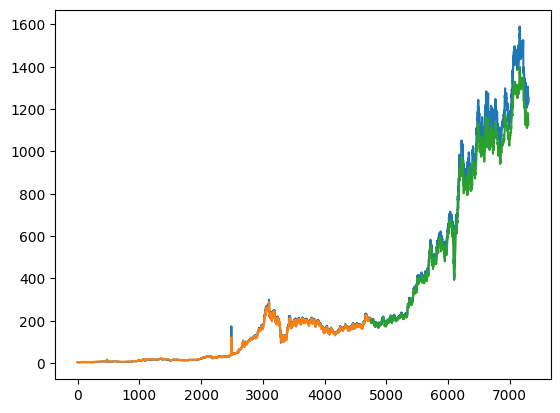

In [33]:
# ### Plotting 
# # shift train predictions for plotting
# look_back=100
# trainPredictPlot = numpy.empty_like(df1)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(df1)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(df1))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()
### Plotting 
# shift train predictions for plotting
# shift train predictions for plotting
look_back = 3
trainPredictPlot = np.full((len(df1), 1), np.nan)
train_predict_len = len(X_train) - look_back
trainPredictPlot[look_back:look_back+train_predict_len, :] = train_predict[:train_predict_len]
# shift test predictions for plotting
testPredictPlot = np.full((len(df1), 1), np.nan)
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = np.resize(test_predict, (max(0, (len(df1)-1)-(len(train_predict)+(look_back*2)+1)), 1))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()






In [34]:
len(test_data)

2557

In [35]:
163-3

160

In [36]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape


(1, 3)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.7759449189697665, 0.7766378511067863, 0.7876935445192084]

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=3
i=0
while(i<10):
    
    if(len(temp_input)>3):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)



[0.7149077]
4
1 day input [0.77663785 0.78769354 0.71490771]
1 day output [[0.6792953]]
2 day input [0.78769354 0.71490771 0.6792953 ]
2 day output [[0.64618194]]
3 day input [0.71490771 0.6792953  0.64618194]
3 day output [[0.61436313]]
4 day input [0.6792953  0.64618194 0.61436313]
4 day output [[0.58672655]]
5 day input [0.64618194 0.61436313 0.58672655]
5 day output [[0.5615949]]
6 day input [0.61436313 0.58672655 0.5615949 ]
6 day output [[0.538649]]
7 day input [0.58672655 0.5615949  0.53864902]
7 day output [[0.5176757]]
8 day input [0.5615949  0.53864902 0.5176757 ]
8 day output [[0.49837884]]
9 day input [0.53864902 0.5176757  0.49837884]
9 day output [[0.48055303]]
[[0.714907705783844], [0.6792953014373779], [0.6461819410324097], [0.6143631339073181], [0.5867265462875366], [0.5615949034690857], [0.5386490225791931], [0.5176756978034973], [0.49837884306907654], [0.4805530309677124]]


In [40]:
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)
day_new = np.arange(1, 4)
day_pred = np.arange(4, 14)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)


7303

In [43]:
465-3

462

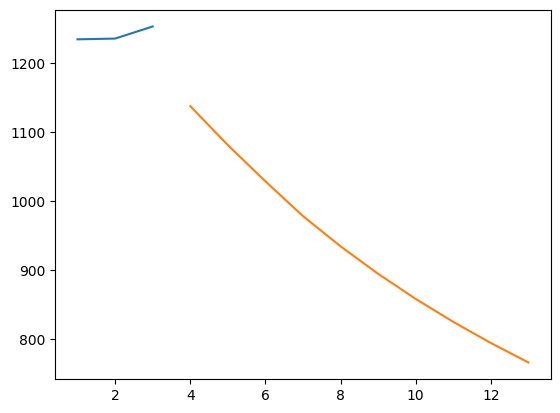

In [44]:
# plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.plot(day_new, scaler.inverse_transform(df1[len(df1)-time_step:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


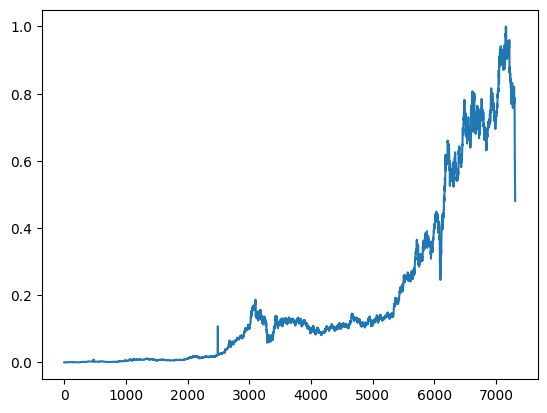

In [45]:
# the full view of the stock chart including the predicted days(lst_output)
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

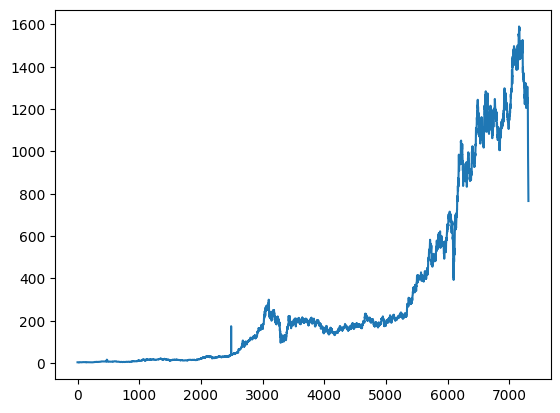

In [47]:
plt.plot(df3)